## Training a neural network  in scikit-learn and Keras

In [62]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
import pandas as pd

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
import numpy as np

In [64]:
RealEstate = pd.read_csv("RealEstate.csv")

In [65]:
RealEstate.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


## Input and output features and split into training and testing sets

In [66]:
X = RealEstate.iloc[:,2:-1] # input features / predictors
Y = RealEstate.iloc[:,-1:] # output feature
Y = np.ravel(Y)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, random_state = 1)

Instantiate the neural network model

In [67]:
NN = MLPRegressor(max_iter = 300, activation = "relu", hidden_layer_sizes = (100, 100))

In [68]:
MLPRegressor?

## Fit and train the MLPRegressor neural network

In [69]:
NN.fit(Xtrain, Ytrain)

# Predict using test input data
NN_pred = NN.predict(Xtest)

# Compute errors
print("MSE: ", mean_squared_error(Ytest, NN_pred))
print("MSE: ", mean_absolute_error(Ytest, NN_pred))

MSE:  54.5086895218216
MSE:  5.122594762606498


## Keras neural network

In [70]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [71]:
# Keep training

model = Sequential()
model.add(Dense(100, input_dim = Xtrain.shape[1], activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics = ["mae"])

history = model.fit(Xtrain, Ytrain, epochs = 300)

Epoch 1/300
10/10 [==============================] - 1s 3ms/step - loss: 3001.5955 - mae: 46.0004
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 1370.9669 - mae: 26.5826
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 629.1741 - mae: 18.2998
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 217.8212 - mae: 10.8899
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 146.2789 - mae: 9.3747
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 109.3630 - mae: 7.5644
Epoch 7/300
10/10 [==============================] - 0s 3ms/step - loss: 96.6311 - mae: 6.8858
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 92.9944 - mae: 6.8801
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 89.5143 - mae: 6.6482
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 86.7474 - mae: 6.4990
Epoch 11/300
10/10 [=================

10/10 [==============================] - 0s 2ms/step - loss: 125.1727 - mae: 7.7987
Epoch 87/300
10/10 [==============================] - 0s 2ms/step - loss: 98.1701 - mae: 7.0406
Epoch 88/300
10/10 [==============================] - 0s 2ms/step - loss: 84.4141 - mae: 6.3978
Epoch 89/300
10/10 [==============================] - 0s 2ms/step - loss: 96.9443 - mae: 6.9922
Epoch 90/300
10/10 [==============================] - 0s 2ms/step - loss: 96.3732 - mae: 6.8516
Epoch 91/300
10/10 [==============================] - 0s 2ms/step - loss: 126.9909 - mae: 8.0020
Epoch 92/300
10/10 [==============================] - 0s 2ms/step - loss: 158.7840 - mae: 8.6144
Epoch 93/300
10/10 [==============================] - 0s 2ms/step - loss: 114.0860 - mae: 7.3823
Epoch 94/300
10/10 [==============================] - 0s 2ms/step - loss: 91.9609 - mae: 6.6544
Epoch 95/300
10/10 [==============================] - 0s 2ms/step - loss: 89.8729 - mae: 6.5724
Epoch 96/300
10/10 [=============================

10/10 [==============================] - 0s 2ms/step - loss: 73.2169 - mae: 5.7928
Epoch 171/300
10/10 [==============================] - 0s 2ms/step - loss: 87.3312 - mae: 6.6404
Epoch 172/300
10/10 [==============================] - 0s 2ms/step - loss: 76.2135 - mae: 5.9185
Epoch 173/300
10/10 [==============================] - 0s 2ms/step - loss: 74.6524 - mae: 5.8813
Epoch 174/300
10/10 [==============================] - 0s 3ms/step - loss: 69.5652 - mae: 5.5394
Epoch 175/300
10/10 [==============================] - 0s 3ms/step - loss: 68.0711 - mae: 5.4690
Epoch 176/300
10/10 [==============================] - 0s 3ms/step - loss: 70.0065 - mae: 5.4523
Epoch 177/300
10/10 [==============================] - 0s 4ms/step - loss: 73.2835 - mae: 5.7907
Epoch 178/300
10/10 [==============================] - 0s 3ms/step - loss: 83.0624 - mae: 6.1997
Epoch 179/300
10/10 [==============================] - 0s 2ms/step - loss: 68.5159 - mae: 5.4543
Epoch 180/300
10/10 [=======================

10/10 [==============================] - 0s 2ms/step - loss: 74.5942 - mae: 5.9802
Epoch 255/300
10/10 [==============================] - 0s 2ms/step - loss: 74.6255 - mae: 6.0117
Epoch 256/300
10/10 [==============================] - 0s 2ms/step - loss: 76.5336 - mae: 6.1835
Epoch 257/300
10/10 [==============================] - 0s 2ms/step - loss: 65.9225 - mae: 5.4116
Epoch 258/300
10/10 [==============================] - 0s 2ms/step - loss: 65.8710 - mae: 5.4547
Epoch 259/300
10/10 [==============================] - 0s 2ms/step - loss: 66.7722 - mae: 5.4468
Epoch 260/300
10/10 [==============================] - 0s 2ms/step - loss: 66.5023 - mae: 5.4778
Epoch 261/300
10/10 [==============================] - 0s 2ms/step - loss: 67.3877 - mae: 5.4463
Epoch 262/300
10/10 [==============================] - 0s 2ms/step - loss: 65.9608 - mae: 5.4045
Epoch 263/300
10/10 [==============================] - 0s 2ms/step - loss: 78.5895 - mae: 6.1858
Epoch 264/300
10/10 [=======================

In [72]:
model.evaluate(Xtest, Ytest)

4/4 [==============================] - 0s 2ms/step - loss: 50.3385 - mae: 5.4531


[50.338504791259766, 5.4530863761901855]

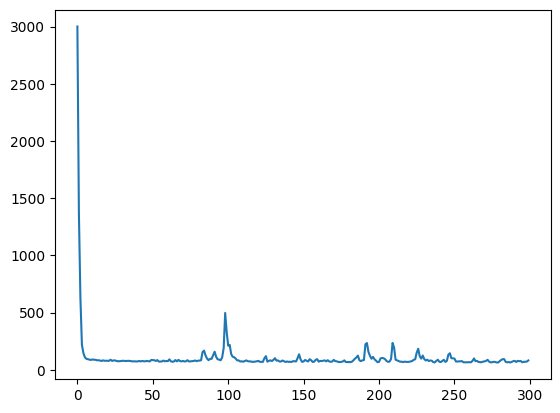

In [73]:
plt.plot(history.history['loss'])

In [74]:
keras.backend.clear_session()

### Changes 5
<div class="alert alert-block alert-info"> <b><span style = "color:#B80000">   

## <u>Initial Conclusion</u></span></b>
### 1)  MLPRegressor is faster than Keras

### 2) Manual Modification 
Manual modification in terms of manipulation is very similar, I can't find automatic way of plotting the loss or cause as a function of Epochs in sklearn,
but with Keras it is easier

### 3) Intuition
Overall Keras seems more beneficial since I can see how to build each layer at a time 
### 4) Large scale applications
SKLearn MLPRegressor and MLPClassifier is used for small scale applications, it also only provides fully connected dense networks, which are a type of layer in a deep neural network that use a linear operation where every input is connected to every output by a weight

### 5) Deep Learning v Others
Overall, I found Keras much better for doing neural network/deep learning. For all other types of models, Scikit-Learn is very capable and useable for SVM, Random Forest, and many more
    </div>